# Predicting Water Quality Using Machine Learning!

<!--
Usage:
activate tf 
(in this directory)
conda install jupyter notebook
jupyter notebook
-->
<br> 

## Abstract
In this project, we will use data provided by the Indian Government on the water quality of various different
rivers in 15 Indian States.  <br>
Using these datapoints, our task is to use Logistic Regression that will learn from these water
samples and classify future unknown samples into the following categories: <br>
<b><i>Good</i></b> <br>
<b><i>Poor</i></b> <br>

There are many suggested proposals to measure the water quality.
We are conducting this analysis by defining the following Water Quality Index <br> (which suits the data given to us)
<br><br>
<i><b>Water Quality Index of a Water Sample = Weighted average of the given features</b></i>
<br><br>
The weights for the given features are specified below: <br>

|No.|Feature|Weight|
|:--|:------|:-----| 
|1.|Dissolved Oxygen|0.281|  
|2.|pH Level|0.165|
|3.|Conductivity|0.009|
|4.|Biological Oxygen Demand|0.234|
|5.|Nitrate and Nitrite Level|0.028|  
|6.|Fecal Coliform|0.281|   


<br>

Purpose of using Machine Learning: To classify samples when there aren't enough valid features provided about the unknown datapoint and to find the correlation between the water sample and the State it was found in (Geographic Feature)
The Logistic Regression model will give us an output of 1 which means that the water sample is of Good Quality, or 0 if it is of Poor Quality.

<br>

## Logistic Regression
Logistic Regression is a binary classification algorithm, which means that it can classify data into two
categories. In our study, we will classify unknown water samples into two categories: Good Water Quality and
Poor Water Quality.

The Logistic Regression algorithm uses the Sigmoid Function as the activation function to calculate the probabilities. The sigmoid function gives an output that ranges from 0 to 1. 
This function introduces a non linearity, in the sense that points on the x axis act as an input to the function and, if the new datapoint corresponds to a value lesser than 0.5, it belongs to the first class (Class 0), and if the datapoint corresponds to a value greater than 0.5, it belongs to the second class. The further away this output is from 0.5, the greater is the assurance that our prediction was correct. 
<br><br>


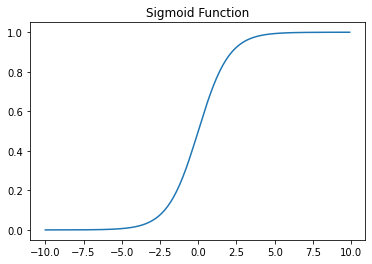

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid_function( z ):
    exponential_vector = np.exp( -z )
    return ( 1 / ( 1 + exponential_vector ) )

x = np.arange( -10, 10, 0.1 )

weight = 1
bias   = 0

y = sigmoid_function( weight * x + bias )

plt.plot( x, y )
plt.title( "Sigmoid Function" )
plt.show()

<br>

## Training the Logistic Regression Model

Training the logistic regression model involves finding the right weights and bias using the training data. To find <i><b>w</b></i> and <i>b</i>, we need to use a cost function called the Sigmoid Cross Entropy Cost Function. This function will then be optimized by Gradient Descent.

![Sigmoid_Cross_Entropy_Cost_Function](sigmoid_cross_entropy_function.png)


## Data Preprocessing

### Phase 1

1) Remove the rows with corrupt data / NaN values <br>
2) Reset the indices, because after removing the rows, the row indices become discontinuous <br>
3) Drop the irrelevant columns that won't help the model <br>
4) Convert the states from string data type to integer, and then apply custom One Hot Encoding <br>

<br>

What is One Hot Encoding? <br>
One Hot Encoding is essentially taking the various categories of a feature, and converting them into features of their own.<br>
For example, if there was a feature titled 'animals' and if the animals listed were: 'dog', 'cat', 'bird', <br>
Then after One Hot Encoding, we will get 3 features which mark whether a data point corresponds to 'dog'/'cat'/'bird' <br>
Sample Dataset before One Hot Encoding- <br>


|Index|Animal|Name|
|:----|:-----|:-------------|
|0|Bird|Tori|
|1|Dog|Biscuit|
|2|Cat|Billy|

Sample Dataset after One Hot Encoding- <br>

|Index|Animal|Name|is_bird|is_dog|is_cat|
|:----|:-----|:---|:------|:-----|:-----|
|0|Bird|Tori|1|0|0|
|1|Dog|Biscuit|0|1|0|
|2|Cat|Billy|0|0|1|


### Phase 2

1) Perform Feature Engineering* on the features involved in calculating the Water Quality Index <br>
2) Assign a class to the water samples based on the calculated Water Quality Index <br>

<br>
* Based on the range of the feature, we will assign each feature of the water sample a value taken from this list: [0,40,60,80,100] <br>
This is a little bit like normalizing the features used to calculate the Water Quality Index 
<br><br>
<b><i>Water Quality Index metric - </i></b> <br>

<b>Dissolved Oxygen (DO)</b>                <br>
100 if DO >= 6                              <br>
80  if DO 6.0 > DO >= 5.1                   <br>
60  if DO 5.1 > DO >= 4.1                   <br>
40  if DO 4.1 > DO >= 3.0                   <br>
0   otherwise                               <br>

<b>pH Level (pH)</b>                        <br>
100 if 8.5 >= pH >= 7.0                     <br>
80  if 8.6 >= pH >  8.5 OR 6.9 > pH >= 6.8  <br>
60  if 8.8 >= pH >  8.6 OR 6.8 > pH >= 6.7  <br>
40  if 9.0 >= pH >  8.8 OR 6.7 > ph >= 6.5  <br>
0   otherwise                               <br>

<b>Conductivity (C)</b>                     <br>
100 if 75 >= C >= 0                         <br>
80  if 150 >= C > 75                        <br>
60  if 225 >= C > 150                       <br>
40  if 300 >= C > 225                       <br>
0   otherwise                               <br>



<b>Biological Oxygen Demand (BOD)</b>       <br>
100 if 3   >= BOD >= 0                      <br>
80  if 6   >= BOD >  3                      <br>
60  if 80  >= BOD >  6                      <br>
40  if 125 >= BOD >  80                     <br>
0   otherwise                               <br>


<b>Nitrate and Nitrite Levels (NN)</b>      <br>
100 if 20  >= NN > 0                        <br>
80  if 50  >= NN > 20                       <br>
60  if 100 >= NN > 50                       <br>
40  if 200 >= NN > 100                      <br>
0   otherwise                               <br>


<b>Fecal Coliform (FC)</b>                  <br>
100 if 5     >= FC >= 0                     <br>
80  if 50    >= FC >  5                     <br>
60  if 500   >= FC >  50                    <br>
40  if 10000 >= FC >  500                   <br>





This has been calculated in accordance with the given dataset. <br> <br>

In [4]:
# Importing the libraries needed for execution
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

print( "\nImporting Process Complete!\n" )


Importing Process Complete!



In [5]:
# At first execution, utf-8 could not decode the data given.

"""
Error handling:
===============
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 1246: invalid start byte
To fix this, open the csv file with 'latin-1' encoding

"""

df = pd.read_csv( "./datasets/d03_water_quality.csv", encoding="latin-1" )
print( "\n\nDataset Shape (Before Preprocessing): ", df.shape )
    
print( "Dataset Before Preprocessing:\n" )
print( df.head() )


# Removing the rows with NaN datapoints
df.dropna( inplace=True )

# Resets the indices. Need to do this because after dropna, the row names do not change 
# First index arrangment turns to the first column, which needs to be deleted
df.reset_index( inplace=True )

df.columns = [ 'dummyName', 'station_code', 'locations', 'states', 'temperature', 'dissolved_oxygen', 'pH', 
               'conductivity', 'biological_oxygen_demand', 'nitrate_nitrite_level', 
               'fecal_coliform', 'total_coliform' ]

# Axis = 1 to represent the columns
df.drop( 'dummyName', 1, inplace = True ) 

# There are 446 unique locations, which means that they will not help in building the model
# This is because in this case, we have a small dataset. The same applies to the station_codes as well
df.drop( 'locations', 1, inplace = True )
df.drop( 'station_code', 1, inplace = True )


def string_transform( df ):
    """
    Converts the Labels in String format (states) into integers, which can be fed into the model
    Parallelly performs preliminary one hot encoding for the strings
    
    """
    states    = df.states
    
    unique_states    = []
    
    # Finding out the unique strings
    for i in range( len(df) ):
       
        if df.states[i] not in unique_states:
            unique_states.append( df.states[i] )
            
    print( "\nNumber of States: ", len( unique_states ) )
    print( "STATES:\n", unique_states )
    
    
    # One Hot Encoding the States and adding their columns to the dataframe
    for state in unique_states:
        is_state = []
        
        for i in range( len(df) ):
            if ( df.states[i] == state ):
                is_state.append( 1 )
            else:
                is_state.append( 0 )
        
        df[ "is_" + state ] = is_state
    
    # The states in string format are not needed anymore
    df.drop( 'states', 1, inplace = True )
    
    return df


df = string_transform( df )

print( "Dataset after First Phase of Data Preprocessing: " )
print( df.head() )



Dataset Shape (Before Preprocessing):  (534, 11)
Dataset Before Preprocessing:

   STATION CODE                                          LOCATIONS  \
0          1312  GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA   
1          2177              GODAVARI RIVER NEAR SOMESHWAR TEMPLE.   
2          2182                        GODAVARI RIVER AT SAIKHEDA.   
3          2179       GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.   
4          2183          GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.   

         STATE  TEMP   DO   pH  CONDUCTIVITY  BOD  NITRATE_N_NITRITE_N  \
0  MAHARASHTRA  29.2  6.4  8.1         735.0  3.4                 2.00   
1  MAHARASHTRA  24.5  6.0  8.0         270.0  3.1                 2.00   
2  MAHARASHTRA  25.8  5.5  7.8         355.0  4.2                 9.00   
3  MAHARASHTRA  24.8  5.5  7.8         371.0  5.6                 3.55   
4  MAHARASHTRA  25.7  5.7  7.9         294.0  3.2                 2.69   

   FECAL_COLIFORM  TOTAL_COLIFORM  
0             3.

In [6]:
# Before we can calculate the Water Quality Index, we need to perform Feature Engineering
# Using Anonymous Functions (lambda) for this

f_dissolved_oxygen = lambda x : ( 100 if ( x >= 6 )
                           else ( 80 if ( 6  >= x >= 5.1 ) 
                           else ( 60 if ( 5  >= x >= 4.1 )  
                           else ( 40 if ( 4.1 >= x >= 3.0) 
                           else ( 0 ) ) ) ) )

f_pH = lambda x : ( 100 if ( 8.5 >= x > 7 ) 
             else ( 80  if ( 8.6 >= 8.5 ) or ( 6.9 >= x >= 6.8 ) 
             else ( 60  if ( 8.8 >= 8.6 ) or ( 6.8 >= x >= 6.7 ) 
             else ( 40  if ( 9.0 >= 8.8 ) or ( 6.7 >= x >= 6.5 ) 
             else ( 0 ) ) ) ) )

f_conductivity = lambda x : ( 100 if ( 75  >= x >= 0   ) 
                       else ( 80  if ( 150 >= x >= 75  ) 
                       else ( 60  if ( 225 >= x >= 150 ) 
                       else ( 40  if ( 300 >= x >= 225 ) 
                       else ( 0 ) ) ) ) )

f_biological_oxygen_demand = lambda x : ( 100 if ( 3   >= x >= 0  )  
                                   else ( 80  if ( 6   >= x >= 3  ) 
                                   else ( 60  if ( 80  >= x >= 6  ) 
                                   else ( 40  if ( 125 >= x >= 80 ) 
                                   else ( 0 ) ) ) ) )

f_nitrate_nitrite_level = lambda x : ( 100 if ( 20  >= x >= 0   ) 
                                else ( 80  if ( 50  >= x >= 20  ) 
                                else ( 60  if ( 100 >= x >= 50  ) 
                                else ( 40  if ( 200 >= x >= 100 ) 
                                else ( 0 ) ) ) ) )

f_fecal_coliform = lambda x : ( 100 if ( 5 >= x >= 0 )
                         else ( 80 if ( 50 >= x >= 5 )
                         else ( 60 if ( 500 >= x >= 50 )
                         else ( 40 if ( 10000 >= x >= 500 ) 
                         else ( 0 ) ) ) ) )


n_dissolved_oxygen         = []
n_pH                       = []
n_conductivity             = []
n_biological_oxygen_demand = []
n_nitrate_nitrite_level    = []
n_fecal_coliform           = []

for i in range( len(df) ):
    
    n_dissolved_oxygen.append( f_dissolved_oxygen( df.dissolved_oxygen[i] ) )
    
    n_pH.append( f_pH( df.pH[i] ) )
    
    n_conductivity.append( f_conductivity( df.conductivity[i] ) )
    
    n_biological_oxygen_demand.append( f_biological_oxygen_demand( df.biological_oxygen_demand[i] ) )
    
    n_nitrate_nitrite_level.append( f_nitrate_nitrite_level( df.nitrate_nitrite_level[i] ) )
    
    n_fecal_coliform.append( f_fecal_coliform( df.fecal_coliform[i] ) )
    
    
df[ 'n_dissolved_oxygen'         ] = n_dissolved_oxygen
df[ 'n_pH'                       ] = n_pH
df[ 'n_conductivity'             ] = n_conductivity
df[ 'n_biological_oxygen_demand' ] = n_biological_oxygen_demand
df[ 'n_nitrate_nitrite_level'    ] = n_nitrate_nitrite_level
df[ 'n_fecal_coliform'           ] = n_fecal_coliform


# Now we need to create the labels based on our Water Quality Index (using the method described above)
def water_quality_index( features ):
    """
    Parameters:
    features = List of the features needed to calculate the Water Quality Index
    Basically, the list looks like this-
    features = [ 
                 dissolved_oxygen,         
                 pH,                       
                 conductivity,            
                 biological_oxygen_demand  
                 nitrate_nitrite_level,    
                 fecal_coliform
               ]
    """
    
    WaterQualityIndex = 0
    WaterQualityIndex_weights = [ 0.281, 0.165, 0.009, 0.234, 0.028, 0.281 ] # Weights defined in the Abstract
    
    for i in range( len(features) ):
        WaterQualityIndex += WaterQualityIndex_weights[i]  *  features[i]
    
    return WaterQualityIndex


# Creating the labels column using the Water Quality Index (WQI)
water_quality = []

for i in range( len(df) ):
        
    WQI = water_quality_index( [ df.n_dissolved_oxygen[i], df.n_pH[i], df.n_conductivity[i], 
                                df.n_biological_oxygen_demand[i], df.n_nitrate_nitrite_level[i],
                                df.n_fecal_coliform[i] ] )
    
    if WQI < 50:
        water_quality.append( 1 ) # Clean / 'Good Quality' Water
    else:
        water_quality.append( 0 ) # Poor Quality Water

df[ 'water_quality' ] = water_quality

print( "\n\nDataset After Preprocessing:\n" )
print( df.head() )



Dataset After Preprocessing:

   temperature  dissolved_oxygen   pH  conductivity  biological_oxygen_demand  \
0         29.2               6.4  8.1         735.0                       3.4   
1         24.5               6.0  8.0         270.0                       3.1   
2         25.8               5.5  7.8         355.0                       4.2   
3         24.8               5.5  7.8         371.0                       5.6   
4         25.7               5.7  7.9         294.0                       3.2   

   nitrate_nitrite_level  fecal_coliform  total_coliform  is_MAHARASHTRA  \
0                   2.00             3.0            73.0               1   
1                   2.00            72.0           182.0               1   
2                   9.00            59.0           133.0               1   
3                   3.55            90.0           283.0               1   
4                   2.69            45.0           132.0               1   

   is_ANDHRA PRADESH  ..

## Dataset Visualization

In [7]:
# Obtaining the Feature Matrix
x = df.iloc[ :, 1: -1 ].values

# Obtaining the Labels
y = df.iloc[ :, -1: ].values

print( "Shape of the Feature Matrix: ", x.shape )
print( "Shape of the Label Vector: ", y.shape )

Shape of the Feature Matrix:  (447, 28)
Shape of the Label Vector:  (447, 1)


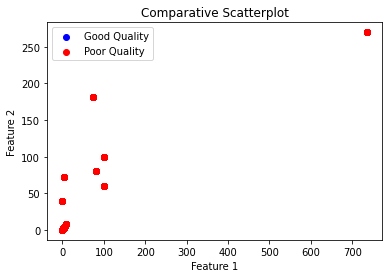

In [8]:
# Now we will compare 2 variables (namely, Temperature and Dissolved Oxygen) 
# and plot the water samples according to their class

good_quality_water_samples = np.array( [x for i in range( len(x) ) if y[i] == 1 ] ) 

poor_quality_water_samples = np.array( [x for i in range( len(x) ) if y[i] == 0 ] )

# We can compare any two features by changing feature1 and feature2
"""
0 - Temperature
1 - Dissolved Oxygen
2 - pH
3 - Conductivity
4 - Biological Oxygen Demand
5 - Nitrate and Nitrite Level
6 - Fecal Coliform
7 - Total Coliform
8-22  - Water Quality in the 15 states
23-29 - Standardized Features taken from 0 to 6
"""
feature1 = 0
feature2 = 1

plt.scatter( good_quality_water_samples[:, feature1], good_quality_water_samples[:, feature2], 
             color = 'blue', label = 'Good Quality' )

plt.scatter( poor_quality_water_samples[:, feature1], poor_quality_water_samples[:, feature2], 
             color = 'red', label = 'Poor Quality' )

plt.xlabel( 'Feature 1' )
plt.ylabel( 'Feature 2' )
plt.title( 'Comparative Scatterplot' )
plt.legend() 

plt.show()
# The plot is like this because most of the water samples contain Poor Quality of water

## One Hot Encoding

In [9]:
# Now we need to perform One Hot Encoding on the rest of the features
# Since the data is numeric, we can use a One Hot Encoder

# Creating the encoder
oneHot = OneHotEncoder()

# Encoding the Feature Matrix
oneHot.fit( x )
x = oneHot.transform( x ).toarray()

# Encoding the Labels
oneHot.fit( y )
y = oneHot.transform( y ).toarray()

alpha, epochs = 0.0035, 500
m, n = len(x), len(x[0])

print( 'm = ', m )
print( 'n = ', n )
print( 'Learning Rate = ', alpha )
print( 'Number of Epochs = ', epochs )

m =  447
n =  1376
Learning Rate =  0.0035
Number of Epochs =  500


## Defining and Training the Model

In [10]:
import tensorflow.compat.v1 as tf # Without this, tf.placeholder will not work
tf.disable_v2_behavior() 

# n columns in Feature Matrix after One Hot Encoding
X = tf.placeholder( tf.float32, [None, n] )

# Binary Classification, hence there are only 2 values 
Y = tf.placeholder( tf.float32, [None, 2] )

# Trainable Weights
W = tf.Variable( tf.zeros( [n,2] ) )

# Trainable bias
b = tf.Variable( tf.zeros( [2] ) )

# Declaring the Hypothesis
hypothesis = tf.nn.sigmoid( tf.add(tf.matmul(X,W), b ) ) # H in the formula stated in the Abstract

# Sigmoid Cross Entropy Cost Function
cost_function = tf.nn.sigmoid_cross_entropy_with_logits( logits = hypothesis, labels = Y )

# Gradient Descent Optimizer (that will act on the cost function)
optimizer = tf.train.GradientDescentOptimizer( learning_rate = alpha ).minimize( cost_function )

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
init = tf.global_variables_initializer()

Weight = []
Bias   = 0

with tf.Session() as session:
    
    session.run( init )
    
    cost_history = []
    accuracy_history = []
    
    
    for epoch in range( 1, epochs + 1 ):
        cost_per_epoch = 0
        
        session.run( optimizer, feed_dict = { X : x, Y : y } )
        
        c = session.run( cost_function, feed_dict = { X : x, Y : y } )
        
        correct_prediction = tf.equal( tf.argmax( hypothesis, 1 ), tf.argmax( Y, 1 ) ) 
        
        accuracy = tf.reduce_mean( tf.cast( correct_prediction, tf.float32 ) )
        
        cost_history.append( sum( sum(c) ) )
        
        accuracy_history.append( accuracy.eval( { X : x, Y : y } ) * 100 )
        
        if epoch % 100 == 0 and epoch != 0:
            print( "Epoch " + str(epoch) + " Cost: " + str( cost_history[-1] ) )
            
    Weight = session.run( W ) # Optimized Weight
    Bias   = session.run( b ) # Optimized Bias
    
    correct_prediction = tf.equal( tf.argmax( hypothesis, 1 ), tf.argmax( Y, 1 ) )
    
    accuracy = tf.reduce_mean( tf.cast( correct_prediction, tf.float32 ) )
    
    print( "\nAccuracy: ", accuracy_history[-1], "%" )
    

Epoch 100 Cost: 461.17529296875
Epoch 200 Cost: 461.0225524902344
Epoch 300 Cost: 460.97076416015625
Epoch 400 Cost: 460.94435119628906
Epoch 500 Cost: 460.92857360839844

Accuracy:  97.53915071487427 %


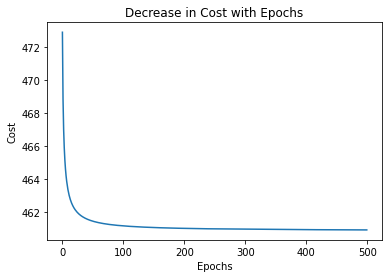

In [12]:
# Plotting the change of cost with each epoch
plt.plot( list(range( epochs ) ), cost_history )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Cost' )
plt.title( 'Decrease in Cost with Epochs' )

plt.show()

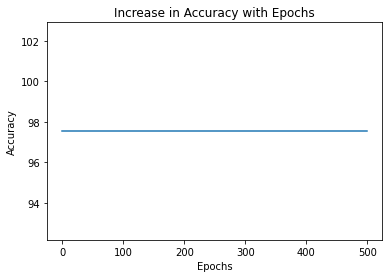

In [13]:
# Plotting the change of accuracy with each epoch
plt.plot( list(range(epochs) ), accuracy_history )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Accuracy' )
plt.title( 'Increase in Accuracy with Epochs' )

plt.show()

## Conclusion

Therefore, the proposed Logistic Regression has been implemented, which successfully classifies the water samples with <br>
over 96% Accuracy!

## References

https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression)

https://www.kaggle.com/utcarshagrawal/water-quality-data?select=waterquality.csv

https://www.kaggle.com/utcarshagrawal/water-quality-prediction-using-sparkml

https://www.geeksforgeeks.org/ml-logistic-regression-using-tensorflow/#:~:text=Prerequisites%3A%20Understanding%20Logistic%20Regression%20and,given%20set%20of%20labeled%20data

https://www.youtube.com/watch?v=yIYKR4sgzI8

https://www.youtube.com/watch?v=v_4KWmkwmsU

https://water-research.net/index.php/water-treatment/water-monitoring/monitoring-the-quality-of-surfacewaters
